In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [2]:
#data loading
df = pd.read_csv('spam.csv', encoding='latin-1')

#view first five rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#view total number of rows and features
df.shape

(5572, 5)

In [4]:
#check memory allocation and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Check the null value
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#Droping unwanted columns

df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [7]:
#view first five rows
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Dropping duplicate values
df.drop_duplicates(inplace = True)

df.shape

(5169, 2)

# Exploratory data analysis

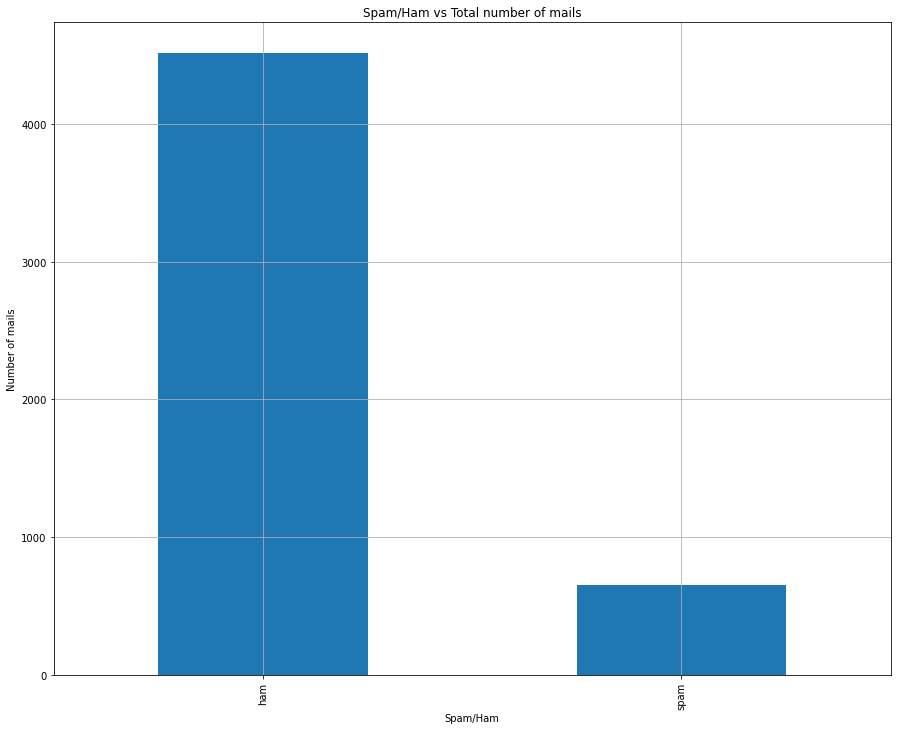

In [9]:
#Create a new figure
plt.figure(figsize=(15,12))
#taking all the count vales
val = df['v1'].value_counts()
#To print bar plot
val.plot(kind='bar')
#Y axis name
plt.ylabel('Number of mails')
#x axis name
plt.xlabel('Spam/Ham')
#title of the plot
plt.title('Spam/Ham vs Total number of mails')
#Create grid
plt.grid()
#Show the plot
plt.show()

In [10]:
cls=df['v1'].value_counts().index.tolist()
val=df['v1'].value_counts()
print(" Total types of Intrusion" , len(val))
print("**" *50)

x = np.argsort(-val.values)
for i in x:
    print( cls[i], ':',val.values[i],'(', np.round((val.values[i]/len(df)*100), 3), '%)')

 Total types of Intrusion 2
****************************************************************************************************
ham : 4516 ( 87.367 %)
spam : 653 ( 12.633 %)


Observation
------------------

There are more number of hams in this dataset than spams

In [11]:
# Concatenate all the texts into a single string
all_text = ' '.join(df['v2'].values)

# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [12]:
# Split the text into individual words
words = all_text.split()

In [13]:
# Removing stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [14]:
# Count the frequency of each and every words
count = Counter(words)
top_words = count.most_common(100)
top_words

[('I', 1375),
 ('u', 614),
 ('2', 423),
 ('get', 313),
 ('call', 310),
 ("I'm", 277),
 ('U', 276),
 ('&lt;', 254),
 ('ur', 252),
 ('You', 243),
 ('go', 228),
 ('4', 226),
 ('like', 212),
 ('know', 206),
 ('got', 198),
 ('?', 183),
 ('come', 182),
 ('.', 168),
 ('...', 160),
 ('want', 153),
 ('time', 146),
 ('need', 140),
 ('going', 138),
 ('How', 135),
 ('Call', 134),
 ('send', 133),
 ('still', 129),
 ('one', 127),
 ('But', 120),
 ('n', 119),
 ('text', 118),
 ('No', 113),
 ('think', 111),
 ('If', 111),
 ('love', 111),
 ('So', 109),
 ('Just', 109),
 ('see', 108),
 ('We', 107),
 ('good', 107),
 ('back', 106),
 ("I'll", 106),
 ('Ì_', 105),
 ('Do', 104),
 ('r', 104),
 ('home', 102),
 ('&', 98),
 ('take', 96),
 ('tell', 96),
 ('What', 94),
 ('free', 94),
 ('And', 94),
 ('Your', 92),
 ('day', 91),
 ('dont', 90),
 ("i'm", 89),
 ('Ok', 87),
 ('me.', 87),
 ('make', 87),
 ('The', 84),
 ('new', 84),
 ('give', 84),
 ('mobile', 83),
 ('A', 83),
 ('you.', 82),
 ('ask', 81),
 ('much', 80),
 ('Hey', 7

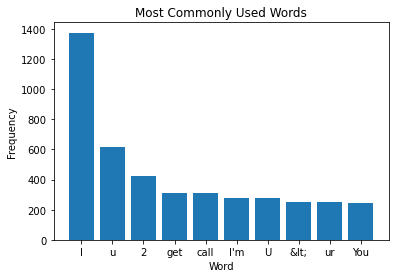

In [15]:
# Create a bar chart of the most common words
top_words = count.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

Observation
------------------

Word 'I' occurs maximum times.

# Data Processing

In [16]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [17]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['v2'].progress_apply(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



Wall time: 19.6 s


In [18]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [19]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  1. Logistic Regression Model

In [20]:
# train a Logistic Regression Model
clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9816247582205029


In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[887,   2],
       [ 17, 128]], dtype=int64)

In [24]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.98      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



###  2. Decision Tree Model

In [27]:
# train a Logistic Regression Model
clf = DecisionTreeClassifier(criterion = 'gini')

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9632495164410058


In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[873,  16],
       [ 22, 123]], dtype=int64)

In [31]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       889
        spam       0.88      0.85      0.87       145

    accuracy                           0.96      1034
   macro avg       0.93      0.92      0.92      1034
weighted avg       0.96      0.96      0.96      1034



###  3. Random Forest Model

In [32]:
# train a Logistic Regression Model
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9748549323017408


In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[888,   1],
       [ 25, 120]], dtype=int64)

In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       889
        spam       0.99      0.83      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



Conclusion
----------------
Based on the precision and recall values we will take Random forest as our final Model.